In [2]:
#importacion de librerias
import math
import datetime
import matplotlib.pyplot as plt
import numpy as np
import sunae

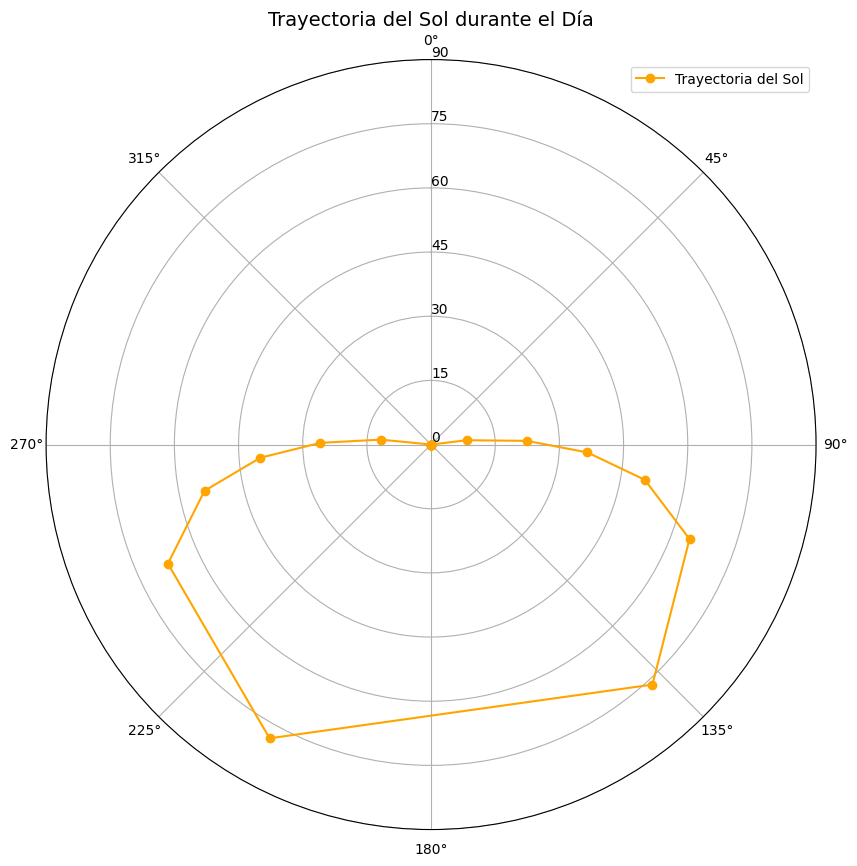

In [6]:
def plot_solar_trajectory(azimuths, elevations):
    """Grafica la trayectoria del Sol en un diagrama polar."""
    
    # Convertir los ángulos de azimut de grados a radianes
    azimuths_rad = np.radians(azimuths)
    
    # Crear una figura y un subgráfico polar
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)
    
    # Graficar la trayectoria del Sol
    ax.plot(azimuths_rad, elevations, marker='o', color='orange', label="Trayectoria del Sol")

    # Configurar la orientación y dirección de los ángulos en el gráfico polar
    ax.set_theta_zero_location('N')  # Establece el norte (0°) en la parte superior
    ax.set_theta_direction(-1)  # Configura la dirección de los ángulos en sentido horario

    # Configurar las etiquetas de elevación
    ax.set_rlabel_position(0)  # Posición de las etiquetas radiales en 0°
    ax.set_yticks(range(0, 91, 15))  # Etiquetas de elevación cada 15 grados
    ax.set_ylim(0, 90)  # Limitar el rango de la elevación de 0 a 90 grados

    # Añadir título y leyenda a la gráfica
    plt.title('Trayectoria del Sol durante el Día', fontsize=14)
    plt.legend(loc="upper right")

    # Mostrar la gráfica
    plt.show()

# Datos de ejemplo
azimuths = [78.11, 83.09, 87.81, 92.89, 99.37, 110.08, 137.32, 208.80, 245.65, 258.47, 265.58, 270.87, 275.60, 280.43, 285.96, 292.95, 302.71, 317.70, 341.28, 11.68, 37.55, 54.35, 65.13, 72.65]
elevations = [0.0, 8.43, 22.46, 36.59, 50.64, 64.33, 76.33, 78.36, 67.53, 54.04, 40.03, 25.90, 11.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

plot_solar_trajectory(azimuths, elevations)

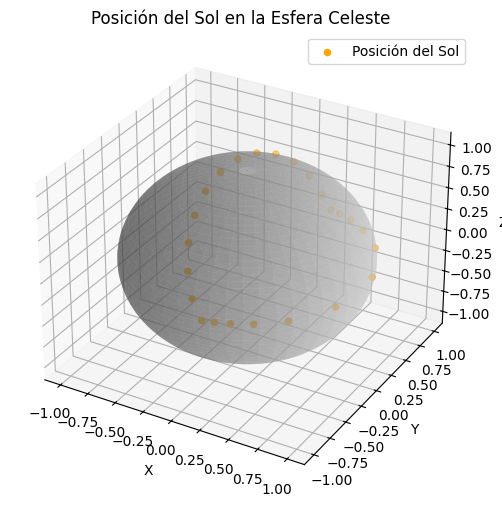

In [9]:
def plot_solar_sphere(azimuths, elevations):
    """Grafica la posición del sol en la esfera celeste durante el día."""

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Crear una esfera
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    u, v = np.meshgrid(u, v)
    x = np.sin(v) * np.cos(u)
    y = np.sin(v) * np.sin(u)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color='lightgrey', alpha=0.5, edgecolor='none')

    # Convertir elevaciones y azimut a coordenadas cartesianas
    azimuths_rad = np.radians(azimuths)
    elevations_rad = np.radians(elevations)
    x_sun = np.cos(elevations_rad) * np.cos(azimuths_rad)
    y_sun = np.cos(elevations_rad) * np.sin(azimuths_rad)
    z_sun = np.sin(elevations_rad)
    
    # Graficar la trayectoria del Sol
    ax.scatter(x_sun, y_sun, z_sun, color='orange', label='Posición del Sol')

    # Configurar el gráfico
    ax.set_title('Posición del Sol en la Esfera Celeste')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.legend()
    plt.show()

# Datos de ejemplo
azimuths = [78.11, 83.09, 87.81, 92.89, 99.37, 110.08, 137.32, 208.80, 245.65, 258.47, 265.58, 270.87, 275.60, 280.43, 285.96, 292.95, 302.71, 317.70, 341.28, 11.68, 37.55, 54.35, 65.13, 72.65]
elevations = [0.0, 8.43, 22.46, 36.59, 50.64, 64.33, 76.33, 78.36, 67.53, 54.04, 40.03, 25.90, 11.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

plot_solar_sphere(azimuths, elevations)

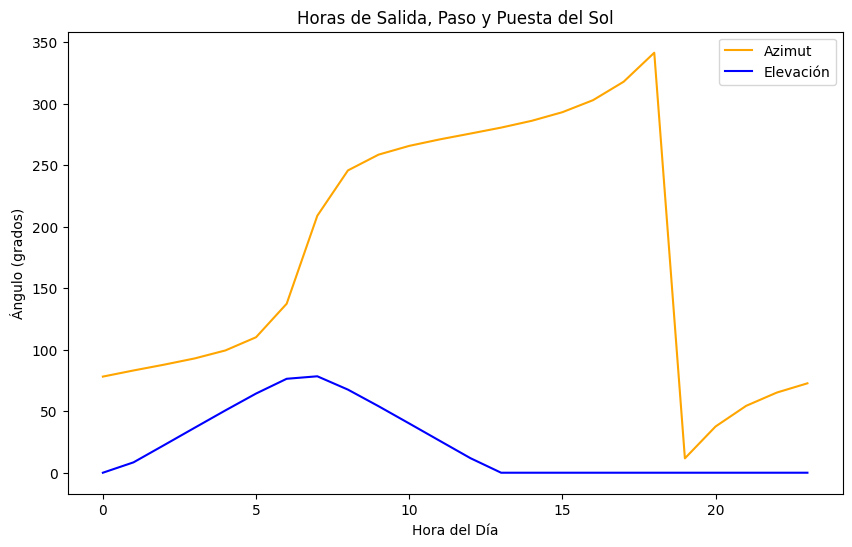

In [8]:
def plot_solar_hourly_chart(azimuths, elevations):
    """Grafica las horas de salida, paso y puesta del sol durante el año."""

    fig, ax = plt.subplots(figsize=(10, 6))

    # Datos de ejemplo
    hours = np.arange(0, 24)
    azimuths = [78.11, 83.09, 87.81, 92.89, 99.37, 110.08, 137.32, 208.80, 245.65, 258.47, 265.58, 270.87, 275.60, 280.43, 285.96, 292.95, 302.71, 317.70, 341.28, 11.68, 37.55, 54.35, 65.13, 72.65]
    elevations = [0.0, 8.43, 22.46, 36.59, 50.64, 64.33, 76.33, 78.36, 67.53, 54.04, 40.03, 25.90, 11.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    
    ax.plot(hours, azimuths, label='Azimut', color='orange')
    ax.plot(hours, elevations, label='Elevación', color='blue')

    # Configurar el gráfico
    ax.set_xlabel('Hora del Día')
    ax.set_ylabel('Ángulo (grados)')
    ax.set_title('Horas de Salida, Paso y Puesta del Sol')
    ax.legend()

    plt.show()

plot_solar_hourly_chart(azimuths, elevations)

In [4]:
def plot_solar_trajectory(azimuths, elevations):
    """Grafica la trayectoria del Sol durante el día en una gráfica polar."""
    
    # Convertir los ángulos de azimut de grados a radianes para la gráfica polar
    azimuths_rad = [az * math.pi / 180 for az in azimuths]
    
    # Convertir a arrays numpy para mejor manipulación
    azimuths_rad = np.array(azimuths_rad)
    elevations = np.array(elevations)
    
    # Filtrar elevaciones negativas y azimuths correspondientes
    valid_indices = elevations > 0  # Consideramos solo elevaciones positivas
    azimuths_rad = azimuths_rad[valid_indices]
    elevations = elevations[valid_indices]
    
    if len(elevations) == 0:
        print("No hay datos válidos para graficar.")
        return
    
    # Crear una figura y un subgráfico polar
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)

    # Usar un gradiente de color para la trayectoria del Sol (colores cálidos para mayor elevación)
    scatter = ax.scatter(azimuths_rad, elevations, c=elevations, cmap='plasma', s=50, edgecolor='black', label="Trayectoria del Sol")

    # Añadir una barra de color para indicar la elevación
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
    cbar.set_label('Elevación (grados)', fontsize=12)

    # Configurar la orientación y dirección de los ángulos en el gráfico polar
    ax.set_theta_zero_location('N')  # Establece el norte (0°) en la parte superior de la gráfica
    ax.set_theta_direction(-1)  # Configura la dirección de los ángulos en sentido horario

    # Configurar las etiquetas de elevación
    ax.set_rlabel_position(0)  # Posición de las etiquetas radiales en 0°
    ax.set_yticks(range(0, 91, 15))  # Añadir etiquetas de elevación cada 15 grados
    ax.set_ylim(0, 90)  # Limitar el rango de la elevación de 0 a 90 grados

    # Añadir líneas de referencia para el horizonte y elevación media
    ax.plot([0, 2 * math.pi], [0, 0], linestyle='--', color='gray', label="Horizonte")
    ax.plot([0, 2 * math.pi], [45, 45], linestyle=':', color='blue', label="Elevación Media")

    # Añadir etiquetas de hora en el borde
    for i, hour in enumerate(range(0, len(azimuths_rad))):
        if i < len(azimuths_rad) and i < len(elevations):  # Asegurarse de que el índice no esté fuera de rango
            ax.text(azimuths_rad[i], elevations[i] + 5, f'{hour}:00', fontsize=8, ha='center')

    # Añadir título y leyenda a la gráfica
    plt.title('Trayectoria del Sol durante el Día', fontsize=14)
    plt.legend(loc="upper right")

    # Mostrar la gráfica
    plt.show()


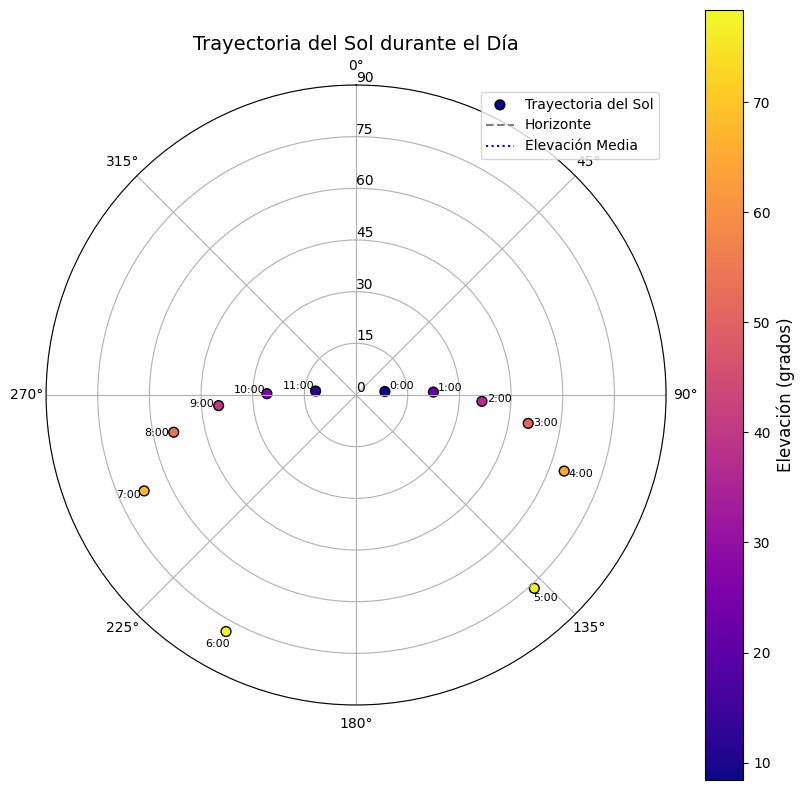

In [5]:
# Crear una instancia de la clase con la fecha y coordenadas
solar_position = sunae.SolarPosition(2024, 242, 19.4326, -99.1332)
    
# Calcular la trayectoria del sol a lo largo del día
azimuths, elevations = solar_position.calculate_daily_trajectory()

# Graficar la trayectoria del sol
plot_solar_trajectory(azimuths, elevations)

*APARTADO PARA CALCULAR LA POSICION ACTUAL*

In [16]:
# Obtener la fecha y hora actual
now = datetime.datetime.now(datetime.UTC)

# Convertir la fecha actual a formato necesario
year = now.year
day_of_year = now.timetuple().tm_yday
hour = now.hour + now.minute / 60 + now.second / 3600  # Hora en UTC decimal

# Latitud y longitud de Ciudad de México
lat = 19.4326  # Latitud de Ciudad de México
long = -99.1332  # Longitud de Ciudad de México

# Calcular la posición actual del Sol
az, el = sunae(year, day_of_year, hour, lat, long)
print(f'Azimut: {az} | Elevación: {el}')

Azimut: 102.61530519417973 | Elevación: 57.820795011500856


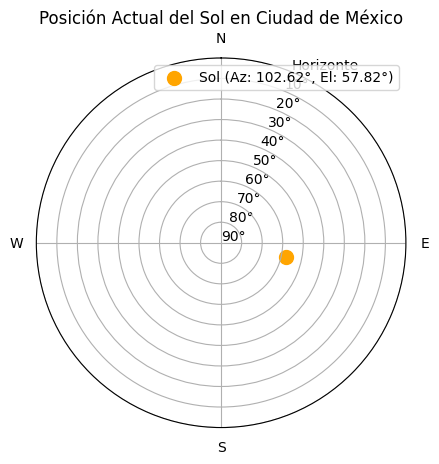

In [17]:
# Graficar la posición actual
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_theta_direction(-1)  # Direccion del azimut
ax.set_theta_offset(math.pi / 2.0)  # 0 grados apunta al norte

# Convertir ángulo a radianes para graficar en coordenadas polares
az_rad = math.radians(az)
el_rad = 90 - el  # Elevar el ángulo (para que 90° sea en el horizonte)

ax.scatter(az_rad, el_rad, c='orange', s=100, label=f'Sol (Az: {az:.2f}°, El: {el:.2f}°)')

# Configuración de la gráfica
ax.set_ylim(0, 90)
ax.set_yticks(range(0, 91, 10))
ax.set_yticklabels(['90°', '80°', '70°', '60°', '50°', '40°', '30°', '20°', '10°', 'Horizonte'])
ax.set_xticks([0, math.pi/2, math.pi, 3*math.pi/2])
ax.set_xticklabels(['N', 'E', 'S', 'W'])
ax.set_title('Posición Actual del Sol en Ciudad de México')

plt.legend()
plt.show()